# Assignment 15

In [90]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [91]:
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=features,
                                    class_names=class_names,
                                    filled=True, rounded=True,
                                    special_characters=True)

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

In [92]:
Penguins = sns.load_dataset('penguins')
Penguins = Penguins.dropna()
Penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [93]:

features = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']
Penguin_train , Penguin_test = train_test_split(Penguins, test_size=0.3,random_state=42, stratify=Penguins['species'])
dt = DecisionTreeClassifier(max_depth=5)

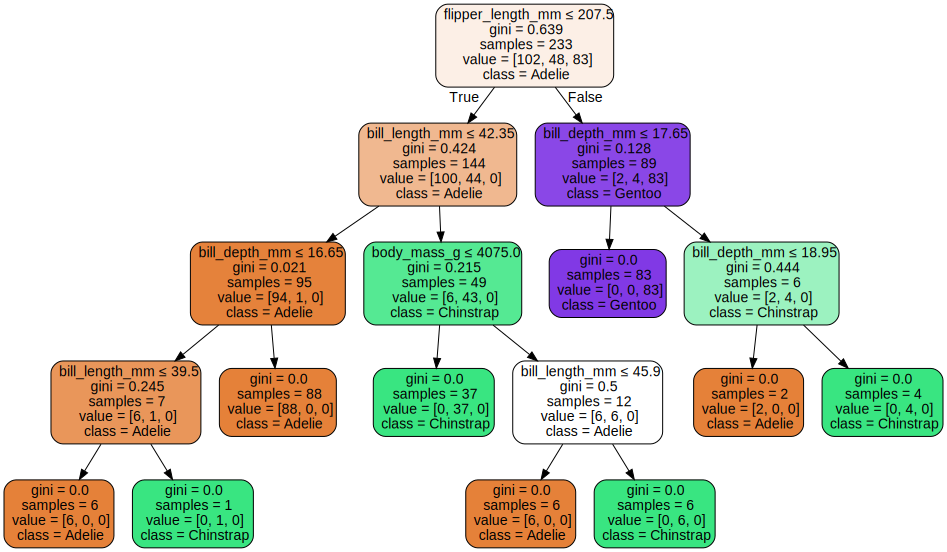

In [94]:
dt.fit(Penguin_train[features], Penguin_train['species'])
plot_tree_classification(dt, features, Penguins['species'].unique())

In [95]:
predictionsOnTrainset = dt.predict(Penguin_train[features])
predictionsOnTestset = dt.predict(Penguin_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, Penguin_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, Penguin_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 1.0
Accuracy on test set 0.95
